# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [4]:
import numpy as np
from glob import glob

# load filenames for human and dog images
#human_files = np.array(glob("lfw/*/*"))
#dog_files = np.array(glob("dogImages/*/*/*"))
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip data

# print number of images in each dataset
#print('There are %d total human images.' % len(human_files))
#print('There are %d total dog images.' % len(dog_files))

In [6]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip data


--2020-07-21 17:02:24--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.145
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip.1’

dogImages.zip.1     100%[===================>]   1.05G  15.4MB/s    in 1m 44s  

2020-07-21 17:04:09 (10.3 MB/s) - ‘dogImages.zip.1’ saved [1132023110/1132023110]

unzip:  cannot find or open data, data.zip or data.ZIP.


In [9]:
dog_files = np.array(glob("dogImages/*/*/*"))
print('There are %d total dog images.' % len(dog_files))

There are 8351 total dog images.


In [10]:
! wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
! unzip lfw.zip
human_files = np.array(glob("lfw/*/*"))
print('There are %d total human images.' % len(human_files))


--2020-07-21 17:10:54--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.128
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  11.9MB/s    in 18s     

2020-07-21 17:11:13 (10.3 MB/s) - ‘lfw.zip’ saved [196739509/196739509]

Archive:  lfw.zip
   creating: lfw/
  inflating: lfw/.DS_Store           
   creating: __MACOSX/
   creating: __MACOSX/lfw/
  inflating: __MACOSX/lfw/._.DS_Store  
   creating: lfw/Aaron_Eckhart/
  inflating: lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Eckhart/
  inflating: __MACOSX/lfw/Aaron_Eckhart/._Aaron_Eckhart_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Eckhart  
   creating: lfw/Aaron_Guiel/
  inflating: lfw/Aa

  inflating: __MACOSX/lfw/Akhmed_Zakayev/._Akhmed_Zakayev_0001.jpg  
  inflating: lfw/Akhmed_Zakayev/Akhmed_Zakayev_0002.jpg  
  inflating: __MACOSX/lfw/Akhmed_Zakayev/._Akhmed_Zakayev_0002.jpg  
  inflating: lfw/Akhmed_Zakayev/Akhmed_Zakayev_0003.jpg  
  inflating: __MACOSX/lfw/Akhmed_Zakayev/._Akhmed_Zakayev_0003.jpg  
  inflating: __MACOSX/lfw/._Akhmed_Zakayev  
   creating: lfw/Akiko_Morigami/
  inflating: lfw/Akiko_Morigami/Akiko_Morigami_0001.jpg  
   creating: __MACOSX/lfw/Akiko_Morigami/
  inflating: __MACOSX/lfw/Akiko_Morigami/._Akiko_Morigami_0001.jpg  
  inflating: __MACOSX/lfw/._Akiko_Morigami  
   creating: lfw/Akmal_Taher/
  inflating: lfw/Akmal_Taher/Akmal_Taher_0001.jpg  
   creating: __MACOSX/lfw/Akmal_Taher/
  inflating: __MACOSX/lfw/Akmal_Taher/._Akmal_Taher_0001.jpg  
  inflating: __MACOSX/lfw/._Akmal_Taher  
   creating: lfw/Al_Cardenas/
  inflating: lfw/Al_Cardenas/Al_Cardenas_0001.jpg  
   creating: __MACOSX/lfw/Al_Cardenas/
  inflating: __MACOSX/lfw/Al_Cardenas/

  inflating: __MACOSX/lfw/Alicia_Keys/._Alicia_Keys_0001.jpg  
  inflating: __MACOSX/lfw/._Alicia_Keys  
   creating: lfw/Alicia_Molik/
  inflating: lfw/Alicia_Molik/Alicia_Molik_0001.jpg  
   creating: __MACOSX/lfw/Alicia_Molik/
  inflating: __MACOSX/lfw/Alicia_Molik/._Alicia_Molik_0001.jpg  
  inflating: __MACOSX/lfw/._Alicia_Molik  
   creating: lfw/Alicia_Silverstone/
  inflating: lfw/Alicia_Silverstone/Alicia_Silverstone_0001.jpg  
   creating: __MACOSX/lfw/Alicia_Silverstone/
  inflating: __MACOSX/lfw/Alicia_Silverstone/._Alicia_Silverstone_0001.jpg  
  inflating: lfw/Alicia_Silverstone/Alicia_Silverstone_0002.jpg  
  inflating: __MACOSX/lfw/Alicia_Silverstone/._Alicia_Silverstone_0002.jpg  
  inflating: __MACOSX/lfw/._Alicia_Silverstone  
   creating: lfw/Alicia_Witt/
  inflating: lfw/Alicia_Witt/Alicia_Witt_0001.jpg  
   creating: __MACOSX/lfw/Alicia_Witt/
  inflating: __MACOSX/lfw/Alicia_Witt/._Alicia_Witt_0001.jpg  
  inflating: __MACOSX/lfw/._Alicia_Witt  
   creating: lfw/A

  inflating: lfw/Andy_Hebb/Andy_Hebb_0002.jpg  
  inflating: __MACOSX/lfw/Andy_Hebb/._Andy_Hebb_0002.jpg  
  inflating: __MACOSX/lfw/._Andy_Hebb  
   creating: lfw/Andy_Lau/
  inflating: lfw/Andy_Lau/Andy_Lau_0001.jpg  
   creating: __MACOSX/lfw/Andy_Lau/
  inflating: __MACOSX/lfw/Andy_Lau/._Andy_Lau_0001.jpg  
  inflating: __MACOSX/lfw/._Andy_Lau  
   creating: lfw/Andy_Madikians/
  inflating: lfw/Andy_Madikians/Andy_Madikians_0001.jpg  
   creating: __MACOSX/lfw/Andy_Madikians/
  inflating: __MACOSX/lfw/Andy_Madikians/._Andy_Madikians_0001.jpg  
  inflating: __MACOSX/lfw/._Andy_Madikians  
   creating: lfw/Andy_North/
  inflating: lfw/Andy_North/Andy_North_0001.jpg  
   creating: __MACOSX/lfw/Andy_North/
  inflating: __MACOSX/lfw/Andy_North/._Andy_North_0001.jpg  
  inflating: __MACOSX/lfw/._Andy_North  
   creating: lfw/Andy_Perez/
  inflating: lfw/Andy_Perez/Andy_Perez_0001.jpg  
   creating: __MACOSX/lfw/Andy_Perez/
  inflating: __MACOSX/lfw/Andy_Perez/._Andy_Perez_0001.jpg  
  in

  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0018.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0018.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0019.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0019.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0020.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0020.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0021.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0021.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0022.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0022.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0023.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0023.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0024.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0024.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0025.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0025.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0026.

  inflating: __MACOSX/lfw/._Barbara_Felt-Miller  
   creating: lfw/Barbara_Roberts/
  inflating: lfw/Barbara_Roberts/Barbara_Roberts_0001.jpg  
   creating: __MACOSX/lfw/Barbara_Roberts/
  inflating: __MACOSX/lfw/Barbara_Roberts/._Barbara_Roberts_0001.jpg  
  inflating: __MACOSX/lfw/._Barbara_Roberts  
   creating: lfw/Barbara_Walters/
  inflating: lfw/Barbara_Walters/Barbara_Walters_0001.jpg  
   creating: __MACOSX/lfw/Barbara_Walters/
  inflating: __MACOSX/lfw/Barbara_Walters/._Barbara_Walters_0001.jpg  
  inflating: lfw/Barbara_Walters/Barbara_Walters_0002.jpg  
  inflating: __MACOSX/lfw/Barbara_Walters/._Barbara_Walters_0002.jpg  
  inflating: lfw/Barbara_Walters/Barbara_Walters_0003.jpg  
  inflating: __MACOSX/lfw/Barbara_Walters/._Barbara_Walters_0003.jpg  
  inflating: lfw/Barbara_Walters/Barbara_Walters_0004.jpg  
  inflating: __MACOSX/lfw/Barbara_Walters/._Barbara_Walters_0004.jpg  
  inflating: __MACOSX/lfw/._Barbara_Walters  
   creating: lfw/Barbora_Strycova/
  inflating: l

  inflating: lfw/Bill_Mauldin/Bill_Mauldin_0001.jpg  
   creating: __MACOSX/lfw/Bill_Mauldin/
  inflating: __MACOSX/lfw/Bill_Mauldin/._Bill_Mauldin_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Mauldin  
   creating: lfw/Bill_McBride/
  inflating: lfw/Bill_McBride/Bill_McBride_0001.jpg  
   creating: __MACOSX/lfw/Bill_McBride/
  inflating: __MACOSX/lfw/Bill_McBride/._Bill_McBride_0001.jpg  
  inflating: lfw/Bill_McBride/Bill_McBride_0002.jpg  
  inflating: __MACOSX/lfw/Bill_McBride/._Bill_McBride_0002.jpg  
  inflating: lfw/Bill_McBride/Bill_McBride_0003.jpg  
  inflating: __MACOSX/lfw/Bill_McBride/._Bill_McBride_0003.jpg  
  inflating: lfw/Bill_McBride/Bill_McBride_0004.jpg  
  inflating: __MACOSX/lfw/Bill_McBride/._Bill_McBride_0004.jpg  
  inflating: lfw/Bill_McBride/Bill_McBride_0005.jpg  
  inflating: __MACOSX/lfw/Bill_McBride/._Bill_McBride_0005.jpg  
  inflating: lfw/Bill_McBride/Bill_McBride_0006.jpg  
  inflating: __MACOSX/lfw/Bill_McBride/._Bill_McBride_0006.jpg  
  inflating: 

   creating: __MACOSX/lfw/Brenda_van_Dam/
  inflating: __MACOSX/lfw/Brenda_van_Dam/._Brenda_van_Dam_0001.jpg  
  inflating: __MACOSX/lfw/._Brenda_van_Dam  
   creating: lfw/Brenda_Wilson/
  inflating: lfw/Brenda_Wilson/Brenda_Wilson_0001.jpg  
   creating: __MACOSX/lfw/Brenda_Wilson/
  inflating: __MACOSX/lfw/Brenda_Wilson/._Brenda_Wilson_0001.jpg  
  inflating: __MACOSX/lfw/._Brenda_Wilson  
   creating: lfw/Brendan_Fraser/
  inflating: lfw/Brendan_Fraser/Brendan_Fraser_0001.jpg  
   creating: __MACOSX/lfw/Brendan_Fraser/
  inflating: __MACOSX/lfw/Brendan_Fraser/._Brendan_Fraser_0001.jpg  
  inflating: __MACOSX/lfw/._Brendan_Fraser  
   creating: lfw/Brendan_Gaughan/
  inflating: lfw/Brendan_Gaughan/Brendan_Gaughan_0001.jpg  
   creating: __MACOSX/lfw/Brendan_Gaughan/
  inflating: __MACOSX/lfw/Brendan_Gaughan/._Brendan_Gaughan_0001.jpg  
  inflating: __MACOSX/lfw/._Brendan_Gaughan  
   creating: lfw/Brendan_Hansen/
  inflating: lfw/Brendan_Hansen/Brendan_Hansen_0001.jpg  
   creating:

  inflating: lfw/Carlos_Menem/Carlos_Menem_0020.jpg  
  inflating: __MACOSX/lfw/Carlos_Menem/._Carlos_Menem_0020.jpg  
  inflating: lfw/Carlos_Menem/Carlos_Menem_0021.jpg  
  inflating: __MACOSX/lfw/Carlos_Menem/._Carlos_Menem_0021.jpg  
  inflating: __MACOSX/lfw/._Carlos_Menem  
   creating: lfw/Carlos_Mesa/
  inflating: lfw/Carlos_Mesa/Carlos_Mesa_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Mesa/
  inflating: __MACOSX/lfw/Carlos_Mesa/._Carlos_Mesa_0001.jpg  
  inflating: lfw/Carlos_Mesa/Carlos_Mesa_0002.jpg  
  inflating: __MACOSX/lfw/Carlos_Mesa/._Carlos_Mesa_0002.jpg  
  inflating: __MACOSX/lfw/._Carlos_Mesa  
   creating: lfw/Carlos_Moya/
  inflating: lfw/Carlos_Moya/Carlos_Moya_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Moya/
  inflating: __MACOSX/lfw/Carlos_Moya/._Carlos_Moya_0001.jpg  
  inflating: lfw/Carlos_Moya/Carlos_Moya_0002.jpg  
  inflating: __MACOSX/lfw/Carlos_Moya/._Carlos_Moya_0002.jpg  
  inflating: lfw/Carlos_Moya/Carlos_Moya_0003.jpg  
  inflating: __MACOSX/lfw/C

  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0003.jpg  
  inflating: lfw/Charles_Taylor/Charles_Taylor_0004.jpg  
  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0004.jpg  
  inflating: lfw/Charles_Taylor/Charles_Taylor_0005.jpg  
  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0005.jpg  
  inflating: lfw/Charles_Taylor/Charles_Taylor_0006.jpg  
  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0006.jpg  
  inflating: lfw/Charles_Taylor/Charles_Taylor_0007.jpg  
  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0007.jpg  
  inflating: lfw/Charles_Taylor/Charles_Taylor_0008.jpg  
  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0008.jpg  
  inflating: lfw/Charles_Taylor/Charles_Taylor_0009.jpg  
  inflating: __MACOSX/lfw/Charles_Taylor/._Charles_Taylor_0009.jpg  
  inflating: __MACOSX/lfw/._Charles_Taylor  
   creating: lfw/Charley_Armey/
  inflating: lfw/Charley_Armey/Charley_Armey_0001.jpg  
   creating: __MACOSX/lfw/Charley_Ar

  inflating: __MACOSX/lfw/Claire_Leger/._Claire_Leger_0001.jpg  
  inflating: lfw/Claire_Leger/Claire_Leger_0002.jpg  
  inflating: __MACOSX/lfw/Claire_Leger/._Claire_Leger_0002.jpg  
  inflating: __MACOSX/lfw/._Claire_Leger  
   creating: lfw/Claire_Tomalin/
  inflating: lfw/Claire_Tomalin/Claire_Tomalin_0001.jpg  
   creating: __MACOSX/lfw/Claire_Tomalin/
  inflating: __MACOSX/lfw/Claire_Tomalin/._Claire_Tomalin_0001.jpg  
  inflating: __MACOSX/lfw/._Claire_Tomalin  
   creating: lfw/Clara_Harris/
  inflating: lfw/Clara_Harris/Clara_Harris_0001.jpg  
   creating: __MACOSX/lfw/Clara_Harris/
  inflating: __MACOSX/lfw/Clara_Harris/._Clara_Harris_0001.jpg  
  inflating: lfw/Clara_Harris/Clara_Harris_0002.jpg  
  inflating: __MACOSX/lfw/Clara_Harris/._Clara_Harris_0002.jpg  
  inflating: lfw/Clara_Harris/Clara_Harris_0003.jpg  
  inflating: __MACOSX/lfw/Clara_Harris/._Clara_Harris_0003.jpg  
  inflating: lfw/Clara_Harris/Clara_Harris_0004.jpg  
  inflating: __MACOSX/lfw/Clara_Harris/._Cla

  inflating: lfw/Colin_Powell/Colin_Powell_0184.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0184.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0185.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0185.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0186.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0186.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0187.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0187.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0188.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0188.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0189.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0189.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0190.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0190.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0191.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0191.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0192.

  inflating: __MACOSX/lfw/Daniele_Hypolito/._Daniele_Hypolito_0001.jpg  
  inflating: __MACOSX/lfw/._Daniele_Hypolito  
   creating: lfw/Daniele_Nardello/
  inflating: lfw/Daniele_Nardello/Daniele_Nardello_0001.jpg  
   creating: __MACOSX/lfw/Daniele_Nardello/
  inflating: __MACOSX/lfw/Daniele_Nardello/._Daniele_Nardello_0001.jpg  
  inflating: __MACOSX/lfw/._Daniele_Nardello  
   creating: lfw/Daniell_Sunjata/
  inflating: lfw/Daniell_Sunjata/Daniell_Sunjata_0001.jpg  
   creating: __MACOSX/lfw/Daniell_Sunjata/
  inflating: __MACOSX/lfw/Daniell_Sunjata/._Daniell_Sunjata_0001.jpg  
  inflating: __MACOSX/lfw/._Daniell_Sunjata  
   creating: lfw/Danielle_Spencer/
  inflating: lfw/Danielle_Spencer/Danielle_Spencer_0001.jpg  
   creating: __MACOSX/lfw/Danielle_Spencer/
  inflating: __MACOSX/lfw/Danielle_Spencer/._Danielle_Spencer_0001.jpg  
  inflating: __MACOSX/lfw/._Danielle_Spencer  
   creating: lfw/Danis_Tanovic/
  inflating: lfw/Danis_Tanovic/Danis_Tanovic_0001.jpg  
   creating: __M

  inflating: lfw/Dawna_LoPiccolo/Dawna_LoPiccolo_0001.jpg  
   creating: __MACOSX/lfw/Dawna_LoPiccolo/
  inflating: __MACOSX/lfw/Dawna_LoPiccolo/._Dawna_LoPiccolo_0001.jpg  
  inflating: __MACOSX/lfw/._Dawna_LoPiccolo  
   creating: lfw/Dean_Barker/
  inflating: lfw/Dean_Barker/Dean_Barker_0001.jpg  
   creating: __MACOSX/lfw/Dean_Barker/
  inflating: __MACOSX/lfw/Dean_Barker/._Dean_Barker_0001.jpg  
  inflating: __MACOSX/lfw/._Dean_Barker  
   creating: lfw/Dean_Barkley/
  inflating: lfw/Dean_Barkley/Dean_Barkley_0001.jpg  
   creating: __MACOSX/lfw/Dean_Barkley/
  inflating: __MACOSX/lfw/Dean_Barkley/._Dean_Barkley_0001.jpg  
  inflating: lfw/Dean_Barkley/Dean_Barkley_0002.jpg  
  inflating: __MACOSX/lfw/Dean_Barkley/._Dean_Barkley_0002.jpg  
  inflating: lfw/Dean_Barkley/Dean_Barkley_0003.jpg  
  inflating: __MACOSX/lfw/Dean_Barkley/._Dean_Barkley_0003.jpg  
  inflating: lfw/Dean_Barkley/Dean_Barkley_0004.jpg  
  inflating: __MACOSX/lfw/Dean_Barkley/._Dean_Barkley_0004.jpg  
  infla

  inflating: lfw/Donald_Anderson/Donald_Anderson_0001.jpg  
   creating: __MACOSX/lfw/Donald_Anderson/
  inflating: __MACOSX/lfw/Donald_Anderson/._Donald_Anderson_0001.jpg  
  inflating: __MACOSX/lfw/._Donald_Anderson  
   creating: lfw/Donald_Carty/
  inflating: lfw/Donald_Carty/Donald_Carty_0001.jpg  
   creating: __MACOSX/lfw/Donald_Carty/
  inflating: __MACOSX/lfw/Donald_Carty/._Donald_Carty_0001.jpg  
  inflating: __MACOSX/lfw/._Donald_Carty  
   creating: lfw/Donald_Evans/
  inflating: lfw/Donald_Evans/Donald_Evans_0001.jpg  
   creating: __MACOSX/lfw/Donald_Evans/
  inflating: __MACOSX/lfw/Donald_Evans/._Donald_Evans_0001.jpg  
  inflating: lfw/Donald_Evans/Donald_Evans_0002.jpg  
  inflating: __MACOSX/lfw/Donald_Evans/._Donald_Evans_0002.jpg  
  inflating: __MACOSX/lfw/._Donald_Evans  
   creating: lfw/Donald_Fehr/
  inflating: lfw/Donald_Fehr/Donald_Fehr_0001.jpg  
   creating: __MACOSX/lfw/Donald_Fehr/
  inflating: __MACOSX/lfw/Donald_Fehr/._Donald_Fehr_0001.jpg  
  inflating

  inflating: lfw/Eddie_Sutton/Eddie_Sutton_0001.jpg  
   creating: __MACOSX/lfw/Eddie_Sutton/
  inflating: __MACOSX/lfw/Eddie_Sutton/._Eddie_Sutton_0001.jpg  
  inflating: lfw/Eddie_Sutton/Eddie_Sutton_0002.jpg  
  inflating: __MACOSX/lfw/Eddie_Sutton/._Eddie_Sutton_0002.jpg  
  inflating: __MACOSX/lfw/._Eddie_Sutton  
   creating: lfw/Eddy_Hartenstein/
  inflating: lfw/Eddy_Hartenstein/Eddy_Hartenstein_0001.jpg  
   creating: __MACOSX/lfw/Eddy_Hartenstein/
  inflating: __MACOSX/lfw/Eddy_Hartenstein/._Eddy_Hartenstein_0001.jpg  
  inflating: __MACOSX/lfw/._Eddy_Hartenstein  
   creating: lfw/Eddy_Merckx/
  inflating: lfw/Eddy_Merckx/Eddy_Merckx_0001.jpg  
   creating: __MACOSX/lfw/Eddy_Merckx/
  inflating: __MACOSX/lfw/Eddy_Merckx/._Eddy_Merckx_0001.jpg  
  inflating: lfw/Eddy_Merckx/Eddy_Merckx_0002.jpg  
  inflating: __MACOSX/lfw/Eddy_Merckx/._Eddy_Merckx_0002.jpg  
  inflating: __MACOSX/lfw/._Eddy_Merckx  
   creating: lfw/Edgar_Savisaar/
  inflating: lfw/Edgar_Savisaar/Edgar_Savisa

  inflating: lfw/Emmanuelle_Beart/Emmanuelle_Beart_0003.jpg  
  inflating: __MACOSX/lfw/Emmanuelle_Beart/._Emmanuelle_Beart_0003.jpg  
  inflating: __MACOSX/lfw/._Emmanuelle_Beart  
   creating: lfw/Emmanuelle_Jagodsinski/
  inflating: lfw/Emmanuelle_Jagodsinski/Emmanuelle_Jagodsinski_0001.jpg  
   creating: __MACOSX/lfw/Emmanuelle_Jagodsinski/
  inflating: __MACOSX/lfw/Emmanuelle_Jagodsinski/._Emmanuelle_Jagodsinski_0001.jpg  
  inflating: __MACOSX/lfw/._Emmanuelle_Jagodsinski  
   creating: lfw/Emmit_Smith/
  inflating: lfw/Emmit_Smith/Emmit_Smith_0001.jpg  
   creating: __MACOSX/lfw/Emmit_Smith/
  inflating: __MACOSX/lfw/Emmit_Smith/._Emmit_Smith_0001.jpg  
  inflating: lfw/Emmit_Smith/Emmit_Smith_0002.jpg  
  inflating: __MACOSX/lfw/Emmit_Smith/._Emmit_Smith_0002.jpg  
  inflating: __MACOSX/lfw/._Emmit_Smith  
   creating: lfw/Emmy_Rossum/
  inflating: lfw/Emmy_Rossum/Emmy_Rossum_0001.jpg  
   creating: __MACOSX/lfw/Emmy_Rossum/
  inflating: __MACOSX/lfw/Emmy_Rossum/._Emmy_Rossum_0

  inflating: lfw/Ester_Canadas/Ester_Canadas_0001.jpg  
   creating: __MACOSX/lfw/Ester_Canadas/
  inflating: __MACOSX/lfw/Ester_Canadas/._Ester_Canadas_0001.jpg  
  inflating: __MACOSX/lfw/._Ester_Canadas  
   creating: lfw/Esther_Macklin/
  inflating: lfw/Esther_Macklin/Esther_Macklin_0001.jpg  
   creating: __MACOSX/lfw/Esther_Macklin/
  inflating: __MACOSX/lfw/Esther_Macklin/._Esther_Macklin_0001.jpg  
  inflating: __MACOSX/lfw/._Esther_Macklin  
   creating: lfw/Ethan_Hawke/
  inflating: lfw/Ethan_Hawke/Ethan_Hawke_0001.jpg  
   creating: __MACOSX/lfw/Ethan_Hawke/
  inflating: __MACOSX/lfw/Ethan_Hawke/._Ethan_Hawke_0001.jpg  
  inflating: lfw/Ethan_Hawke/Ethan_Hawke_0002.jpg  
  inflating: __MACOSX/lfw/Ethan_Hawke/._Ethan_Hawke_0002.jpg  
  inflating: lfw/Ethan_Hawke/Ethan_Hawke_0003.jpg  
  inflating: __MACOSX/lfw/Ethan_Hawke/._Ethan_Hawke_0003.jpg  
  inflating: lfw/Ethan_Hawke/Ethan_Hawke_0004.jpg  
  inflating: __MACOSX/lfw/Ethan_Hawke/._Ethan_Hawke_0004.jpg  
  inflating: __M

  inflating: lfw/Frank_Sinatra/Frank_Sinatra_0001.jpg  
   creating: __MACOSX/lfw/Frank_Sinatra/
  inflating: __MACOSX/lfw/Frank_Sinatra/._Frank_Sinatra_0001.jpg  
  inflating: __MACOSX/lfw/._Frank_Sinatra  
   creating: lfw/Frank_Solich/
  inflating: lfw/Frank_Solich/Frank_Solich_0001.jpg  
   creating: __MACOSX/lfw/Frank_Solich/
  inflating: __MACOSX/lfw/Frank_Solich/._Frank_Solich_0001.jpg  
  inflating: lfw/Frank_Solich/Frank_Solich_0002.jpg  
  inflating: __MACOSX/lfw/Frank_Solich/._Frank_Solich_0002.jpg  
  inflating: lfw/Frank_Solich/Frank_Solich_0003.jpg  
  inflating: __MACOSX/lfw/Frank_Solich/._Frank_Solich_0003.jpg  
  inflating: lfw/Frank_Solich/Frank_Solich_0004.jpg  
  inflating: __MACOSX/lfw/Frank_Solich/._Frank_Solich_0004.jpg  
  inflating: lfw/Frank_Solich/Frank_Solich_0005.jpg  
  inflating: __MACOSX/lfw/Frank_Solich/._Frank_Solich_0005.jpg  
  inflating: __MACOSX/lfw/._Frank_Solich  
   creating: lfw/Frank_Stallone/
  inflating: lfw/Frank_Stallone/Frank_Stallone_000

  inflating: lfw/George_Robertson/George_Robertson_0020.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0020.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0021.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0021.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0022.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0022.jpg  
  inflating: __MACOSX/lfw/._George_Robertson  
   creating: lfw/George_Roy_Hill/
  inflating: lfw/George_Roy_Hill/George_Roy_Hill_0001.jpg  
   creating: __MACOSX/lfw/George_Roy_Hill/
  inflating: __MACOSX/lfw/George_Roy_Hill/._George_Roy_Hill_0001.jpg  
  inflating: lfw/George_Roy_Hill/George_Roy_Hill_0002.jpg  
  inflating: __MACOSX/lfw/George_Roy_Hill/._George_Roy_Hill_0002.jpg  
  inflating: __MACOSX/lfw/._George_Roy_Hill  
   creating: lfw/George_Ryan/
  inflating: lfw/George_Ryan/George_Ryan_0001.jpg  
   creating: __MACOSX/lfw/George_Ryan/
  inflating: __MACOSX/lfw/George_Ryan/._Ge

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0249.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0250.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0250.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0251.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0251.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0252.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0252.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0253.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0253.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0254.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0254.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0255.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0255.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0256.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0256.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0257.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0501.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0502.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0502.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0503.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0503.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0504.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0504.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0505.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0505.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0506.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0506.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0507.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0507.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0508.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0508.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0509.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/Glafcos_Clerides/._Glafcos_Clerides_0002.jpg  
  inflating: lfw/Glafcos_Clerides/Glafcos_Clerides_0003.jpg  
  inflating: __MACOSX/lfw/Glafcos_Clerides/._Glafcos_Clerides_0003.jpg  
  inflating: lfw/Glafcos_Clerides/Glafcos_Clerides_0004.jpg  
  inflating: __MACOSX/lfw/Glafcos_Clerides/._Glafcos_Clerides_0004.jpg  
  inflating: __MACOSX/lfw/._Glafcos_Clerides  
   creating: lfw/Glen_Clark/
  inflating: lfw/Glen_Clark/Glen_Clark_0001.jpg  
   creating: __MACOSX/lfw/Glen_Clark/
  inflating: __MACOSX/lfw/Glen_Clark/._Glen_Clark_0001.jpg  
  inflating: __MACOSX/lfw/._Glen_Clark  
   creating: lfw/Glen_DaSilva/
  inflating: lfw/Glen_DaSilva/Glen_DaSilva_0001.jpg  
   creating: __MACOSX/lfw/Glen_DaSilva/
  inflating: __MACOSX/lfw/Glen_DaSilva/._Glen_DaSilva_0001.jpg  
  inflating: __MACOSX/lfw/._Glen_DaSilva  
   creating: lfw/Glen_Sather/
  inflating: lfw/Glen_Sather/Glen_Sather_0001.jpg  
   creating: __MACOSX/lfw/Glen_Sather/
  inflating: __MACOSX/lfw/Glen_Sather

  inflating: lfw/Guillermo_Monroy/Guillermo_Monroy_0001.jpg  
   creating: __MACOSX/lfw/Guillermo_Monroy/
  inflating: __MACOSX/lfw/Guillermo_Monroy/._Guillermo_Monroy_0001.jpg  
  inflating: __MACOSX/lfw/._Guillermo_Monroy  
   creating: lfw/Guillermo_Ortiz/
  inflating: lfw/Guillermo_Ortiz/Guillermo_Ortiz_0001.jpg  
   creating: __MACOSX/lfw/Guillermo_Ortiz/
  inflating: __MACOSX/lfw/Guillermo_Ortiz/._Guillermo_Ortiz_0001.jpg  
  inflating: lfw/Guillermo_Ortiz/Guillermo_Ortiz_0002.jpg  
  inflating: __MACOSX/lfw/Guillermo_Ortiz/._Guillermo_Ortiz_0002.jpg  
  inflating: __MACOSX/lfw/._Guillermo_Ortiz  
   creating: lfw/Guillermo_Ruiz_Polanco/
  inflating: lfw/Guillermo_Ruiz_Polanco/Guillermo_Ruiz_Polanco_0001.jpg  
   creating: __MACOSX/lfw/Guillermo_Ruiz_Polanco/
  inflating: __MACOSX/lfw/Guillermo_Ruiz_Polanco/._Guillermo_Ruiz_Polanco_0001.jpg  
  inflating: __MACOSX/lfw/._Guillermo_Ruiz_Polanco  
   creating: lfw/Gunilla_Backman/
  inflating: lfw/Gunilla_Backman/Gunilla_Backman_000

   creating: __MACOSX/lfw/Hassan_Nasrallah/
  inflating: __MACOSX/lfw/Hassan_Nasrallah/._Hassan_Nasrallah_0001.jpg  
  inflating: lfw/Hassan_Nasrallah/Hassan_Nasrallah_0002.jpg  
  inflating: __MACOSX/lfw/Hassan_Nasrallah/._Hassan_Nasrallah_0002.jpg  
  inflating: __MACOSX/lfw/._Hassan_Nasrallah  
   creating: lfw/Hassan_Wirajuda/
  inflating: lfw/Hassan_Wirajuda/Hassan_Wirajuda_0001.jpg  
   creating: __MACOSX/lfw/Hassan_Wirajuda/
  inflating: __MACOSX/lfw/Hassan_Wirajuda/._Hassan_Wirajuda_0001.jpg  
  inflating: lfw/Hassan_Wirajuda/Hassan_Wirajuda_0002.jpg  
  inflating: __MACOSX/lfw/Hassan_Wirajuda/._Hassan_Wirajuda_0002.jpg  
  inflating: __MACOSX/lfw/._Hassan_Wirajuda  
   creating: lfw/Hassanal_Bolkiah/
  inflating: lfw/Hassanal_Bolkiah/Hassanal_Bolkiah_0001.jpg  
   creating: __MACOSX/lfw/Hassanal_Bolkiah/
  inflating: __MACOSX/lfw/Hassanal_Bolkiah/._Hassanal_Bolkiah_0001.jpg  
  inflating: __MACOSX/lfw/._Hassanal_Bolkiah  
   creating: lfw/Hatsui_Hasuike/
  inflating: lfw/Hatsu

  inflating: lfw/Hu_Jintao/Hu_Jintao_0009.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0009.jpg  
  inflating: lfw/Hu_Jintao/Hu_Jintao_0010.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0010.jpg  
  inflating: lfw/Hu_Jintao/Hu_Jintao_0011.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0011.jpg  
  inflating: lfw/Hu_Jintao/Hu_Jintao_0012.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0012.jpg  
  inflating: lfw/Hu_Jintao/Hu_Jintao_0013.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0013.jpg  
  inflating: lfw/Hu_Jintao/Hu_Jintao_0014.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0014.jpg  
  inflating: lfw/Hu_Jintao/Hu_Jintao_0015.jpg  
  inflating: __MACOSX/lfw/Hu_Jintao/._Hu_Jintao_0015.jpg  
  inflating: __MACOSX/lfw/._Hu_Jintao  
   creating: lfw/Hu_Maoyuan/
  inflating: lfw/Hu_Maoyuan/Hu_Maoyuan_0001.jpg  
   creating: __MACOSX/lfw/Hu_Maoyuan/
  inflating: __MACOSX/lfw/Hu_Maoyuan/._Hu_Maoyuan_0001.jpg  
  inflating: __MACOSX/lfw/._Hu_Ma

  inflating: lfw/Isabel_Orellana/Isabel_Orellana_0001.jpg  
   creating: __MACOSX/lfw/Isabel_Orellana/
  inflating: __MACOSX/lfw/Isabel_Orellana/._Isabel_Orellana_0001.jpg  
  inflating: __MACOSX/lfw/._Isabel_Orellana  
   creating: lfw/Isabela_Moraes/
  inflating: lfw/Isabela_Moraes/Isabela_Moraes_0001.jpg  
   creating: __MACOSX/lfw/Isabela_Moraes/
  inflating: __MACOSX/lfw/Isabela_Moraes/._Isabela_Moraes_0001.jpg  
  inflating: __MACOSX/lfw/._Isabela_Moraes  
   creating: lfw/Isabella_Rossellini/
  inflating: lfw/Isabella_Rossellini/Isabella_Rossellini_0001.jpg  
   creating: __MACOSX/lfw/Isabella_Rossellini/
  inflating: __MACOSX/lfw/Isabella_Rossellini/._Isabella_Rossellini_0001.jpg  
  inflating: lfw/Isabella_Rossellini/Isabella_Rossellini_0002.jpg  
  inflating: __MACOSX/lfw/Isabella_Rossellini/._Isabella_Rossellini_0002.jpg  
  inflating: lfw/Isabella_Rossellini/Isabella_Rossellini_0003.jpg  
  inflating: __MACOSX/lfw/Isabella_Rossellini/._Isabella_Rossellini_0003.jpg  
  infla

  inflating: lfw/James_Cameron/James_Cameron_0003.jpg  
  inflating: __MACOSX/lfw/James_Cameron/._James_Cameron_0003.jpg  
  inflating: __MACOSX/lfw/._James_Cameron  
   creating: lfw/James_Carville/
  inflating: lfw/James_Carville/James_Carville_0001.jpg  
   creating: __MACOSX/lfw/James_Carville/
  inflating: __MACOSX/lfw/James_Carville/._James_Carville_0001.jpg  
  inflating: __MACOSX/lfw/._James_Carville  
   creating: lfw/James_Coburn/
  inflating: lfw/James_Coburn/James_Coburn_0001.jpg  
   creating: __MACOSX/lfw/James_Coburn/
  inflating: __MACOSX/lfw/James_Coburn/._James_Coburn_0001.jpg  
  inflating: __MACOSX/lfw/._James_Coburn  
   creating: lfw/James_Collinson/
  inflating: lfw/James_Collinson/James_Collinson_0001.jpg  
   creating: __MACOSX/lfw/James_Collinson/
  inflating: __MACOSX/lfw/James_Collinson/._James_Collinson_0001.jpg  
  inflating: __MACOSX/lfw/._James_Collinson  
   creating: lfw/James_Comey/
  inflating: lfw/James_Comey/James_Comey_0001.jpg  
   creating: __MA

  inflating: lfw/Jason_Vale/Jason_Vale_0001.jpg  
   creating: __MACOSX/lfw/Jason_Vale/
  inflating: __MACOSX/lfw/Jason_Vale/._Jason_Vale_0001.jpg  
  inflating: __MACOSX/lfw/._Jason_Vale  
   creating: lfw/Jason_White/
  inflating: lfw/Jason_White/Jason_White_0001.jpg  
   creating: __MACOSX/lfw/Jason_White/
  inflating: __MACOSX/lfw/Jason_White/._Jason_White_0001.jpg  
  inflating: __MACOSX/lfw/._Jason_White  
   creating: lfw/Javier_Bardem/
  inflating: lfw/Javier_Bardem/Javier_Bardem_0001.jpg  
   creating: __MACOSX/lfw/Javier_Bardem/
  inflating: __MACOSX/lfw/Javier_Bardem/._Javier_Bardem_0001.jpg  
  inflating: __MACOSX/lfw/._Javier_Bardem  
   creating: lfw/Javier_Camara/
  inflating: lfw/Javier_Camara/Javier_Camara_0001.jpg  
   creating: __MACOSX/lfw/Javier_Camara/
  inflating: __MACOSX/lfw/Javier_Camara/._Javier_Camara_0001.jpg  
  inflating: __MACOSX/lfw/._Javier_Camara  
   creating: lfw/Javier_Delgado/
  inflating: lfw/Javier_Delgado/Javier_Delgado_0001.jpg  
   creating: 

  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0011.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0011.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0012.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0012.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0013.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0013.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0014.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0014.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0015.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0015.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0016.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0016.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0017.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0017.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0018

  inflating: lfw/Jim_Ahern/Jim_Ahern_0001.jpg  
   creating: __MACOSX/lfw/Jim_Ahern/
  inflating: __MACOSX/lfw/Jim_Ahern/._Jim_Ahern_0001.jpg  
  inflating: __MACOSX/lfw/._Jim_Ahern  
   creating: lfw/Jim_Anderson/
  inflating: lfw/Jim_Anderson/Jim_Anderson_0001.jpg  
   creating: __MACOSX/lfw/Jim_Anderson/
  inflating: __MACOSX/lfw/Jim_Anderson/._Jim_Anderson_0001.jpg  
  inflating: __MACOSX/lfw/._Jim_Anderson  
   creating: lfw/Jim_Beattie/
  inflating: lfw/Jim_Beattie/Jim_Beattie_0001.jpg  
   creating: __MACOSX/lfw/Jim_Beattie/
  inflating: __MACOSX/lfw/Jim_Beattie/._Jim_Beattie_0001.jpg  
  inflating: __MACOSX/lfw/._Jim_Beattie  
   creating: lfw/Jim_Bollman/
  inflating: lfw/Jim_Bollman/Jim_Bollman_0001.jpg  
   creating: __MACOSX/lfw/Jim_Bollman/
  inflating: __MACOSX/lfw/Jim_Bollman/._Jim_Bollman_0001.jpg  
  inflating: __MACOSX/lfw/._Jim_Bollman  
   creating: lfw/Jim_Bunning/
  inflating: lfw/Jim_Bunning/Jim_Bunning_0001.jpg  
   creating: __MACOSX/lfw/Jim_Bunning/
  inflatin

  inflating: lfw/John_Anderson/John_Anderson_0001.jpg  
   creating: __MACOSX/lfw/John_Anderson/
  inflating: __MACOSX/lfw/John_Anderson/._John_Anderson_0001.jpg  
  inflating: __MACOSX/lfw/._John_Anderson  
   creating: lfw/John_Ashcroft/
  inflating: lfw/John_Ashcroft/John_Ashcroft_0001.jpg  
   creating: __MACOSX/lfw/John_Ashcroft/
  inflating: __MACOSX/lfw/John_Ashcroft/._John_Ashcroft_0001.jpg  
  inflating: lfw/John_Ashcroft/John_Ashcroft_0002.jpg  
  inflating: __MACOSX/lfw/John_Ashcroft/._John_Ashcroft_0002.jpg  
  inflating: lfw/John_Ashcroft/John_Ashcroft_0003.jpg  
  inflating: __MACOSX/lfw/John_Ashcroft/._John_Ashcroft_0003.jpg  
  inflating: lfw/John_Ashcroft/John_Ashcroft_0004.jpg  
  inflating: __MACOSX/lfw/John_Ashcroft/._John_Ashcroft_0004.jpg  
  inflating: lfw/John_Ashcroft/John_Ashcroft_0005.jpg  
  inflating: __MACOSX/lfw/John_Ashcroft/._John_Ashcroft_0005.jpg  
  inflating: lfw/John_Ashcroft/John_Ashcroft_0006.jpg  
  inflating: __MACOSX/lfw/John_Ashcroft/._John_A

  inflating: lfw/John_Paul_II/John_Paul_II_0002.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0002.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0003.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0003.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0004.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0004.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0005.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0005.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0006.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0006.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0007.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0007.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0008.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0008.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0009.jpg  
  inflating: __MACOSX/lfw/John_Paul_II/._John_Paul_II_0009.jpg  
  inflating: lfw/John_Paul_II/John_Paul_II_0010.

  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0010.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0011.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0011.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0012.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0012.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0013.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0013.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0014.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0014.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0015.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0015.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0016.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria_Aznar_0016.jpg  
  inflating: lfw/Jose_Maria_Aznar/Jose_Maria_Aznar_0017.jpg  
  inflating: __MACOSX/lfw/Jose_Maria_Aznar/._Jose_Maria

  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0003.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0003.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0004.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0004.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0005.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0005.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0006.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0006.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0007.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0007.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0008.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0008.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0009.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0009.jpg  
  inflating: lfw/Junichiro_

  inflating: lfw/Kelly_Leigh/Kelly_Leigh_0001.jpg  
   creating: __MACOSX/lfw/Kelly_Leigh/
  inflating: __MACOSX/lfw/Kelly_Leigh/._Kelly_Leigh_0001.jpg  
  inflating: __MACOSX/lfw/._Kelly_Leigh  
   creating: lfw/Kelly_Osbourne/
  inflating: lfw/Kelly_Osbourne/Kelly_Osbourne_0001.jpg  
   creating: __MACOSX/lfw/Kelly_Osbourne/
  inflating: __MACOSX/lfw/Kelly_Osbourne/._Kelly_Osbourne_0001.jpg  
  inflating: __MACOSX/lfw/._Kelly_Osbourne  
   creating: lfw/Kelly_Ripa/
  inflating: lfw/Kelly_Ripa/Kelly_Ripa_0001.jpg  
   creating: __MACOSX/lfw/Kelly_Ripa/
  inflating: __MACOSX/lfw/Kelly_Ripa/._Kelly_Ripa_0001.jpg  
  inflating: __MACOSX/lfw/._Kelly_Ripa  
   creating: lfw/Kelly_Santos/
  inflating: lfw/Kelly_Santos/Kelly_Santos_0001.jpg  
   creating: __MACOSX/lfw/Kelly_Santos/
  inflating: __MACOSX/lfw/Kelly_Santos/._Kelly_Santos_0001.jpg  
  inflating: __MACOSX/lfw/._Kelly_Santos  
   creating: lfw/Kelsey_Grammer/
  inflating: lfw/Kelsey_Grammer/Kelsey_Grammer_0001.jpg  
   creating: _

   creating: lfw/Kim_Dong-hwa/
  inflating: lfw/Kim_Dong-hwa/Kim_Dong-hwa_0001.jpg  
   creating: __MACOSX/lfw/Kim_Dong-hwa/
  inflating: __MACOSX/lfw/Kim_Dong-hwa/._Kim_Dong-hwa_0001.jpg  
  inflating: __MACOSX/lfw/._Kim_Dong-hwa  
   creating: lfw/Kim_Dong-tae/
  inflating: lfw/Kim_Dong-tae/Kim_Dong-tae_0001.jpg  
   creating: __MACOSX/lfw/Kim_Dong-tae/
  inflating: __MACOSX/lfw/Kim_Dong-tae/._Kim_Dong-tae_0001.jpg  
  inflating: __MACOSX/lfw/._Kim_Dong-tae  
   creating: lfw/Kim_Gandy/
  inflating: lfw/Kim_Gandy/Kim_Gandy_0001.jpg  
   creating: __MACOSX/lfw/Kim_Gandy/
  inflating: __MACOSX/lfw/Kim_Gandy/._Kim_Gandy_0001.jpg  
  inflating: __MACOSX/lfw/._Kim_Gandy  
   creating: lfw/Kim_Hong-gul/
  inflating: lfw/Kim_Hong-gul/Kim_Hong-gul_0001.jpg  
   creating: __MACOSX/lfw/Kim_Hong-gul/
  inflating: __MACOSX/lfw/Kim_Hong-gul/._Kim_Hong-gul_0001.jpg  
  inflating: __MACOSX/lfw/._Kim_Hong-gul  
   creating: lfw/Kim_Hong-up/
  inflating: lfw/Kim_Hong-up/Kim_Hong-up_0001.jpg  
   crea

  inflating: lfw/Lachlan_Murdoch/Lachlan_Murdoch_0001.jpg  
   creating: __MACOSX/lfw/Lachlan_Murdoch/
  inflating: __MACOSX/lfw/Lachlan_Murdoch/._Lachlan_Murdoch_0001.jpg  
  inflating: __MACOSX/lfw/._Lachlan_Murdoch  
   creating: lfw/Laila_Ali/
  inflating: lfw/Laila_Ali/Laila_Ali_0001.jpg  
   creating: __MACOSX/lfw/Laila_Ali/
  inflating: __MACOSX/lfw/Laila_Ali/._Laila_Ali_0001.jpg  
  inflating: lfw/Laila_Ali/Laila_Ali_0002.jpg  
  inflating: __MACOSX/lfw/Laila_Ali/._Laila_Ali_0002.jpg  
  inflating: lfw/Laila_Ali/Laila_Ali_0003.jpg  
  inflating: __MACOSX/lfw/Laila_Ali/._Laila_Ali_0003.jpg  
  inflating: __MACOSX/lfw/._Laila_Ali  
   creating: lfw/Lana_Clarkson/
  inflating: lfw/Lana_Clarkson/Lana_Clarkson_0001.jpg  
   creating: __MACOSX/lfw/Lana_Clarkson/
  inflating: __MACOSX/lfw/Lana_Clarkson/._Lana_Clarkson_0001.jpg  
  inflating: lfw/Lana_Clarkson/Lana_Clarkson_0002.jpg  
  inflating: __MACOSX/lfw/Lana_Clarkson/._Lana_Clarkson_0002.jpg  
  inflating: __MACOSX/lfw/._Lana_Cl

  inflating: __MACOSX/lfw/._Lee_Yeo-jin  
   creating: lfw/Lee_Yuan-tseh/
  inflating: lfw/Lee_Yuan-tseh/Lee_Yuan-tseh_0001.jpg  
   creating: __MACOSX/lfw/Lee_Yuan-tseh/
  inflating: __MACOSX/lfw/Lee_Yuan-tseh/._Lee_Yuan-tseh_0001.jpg  
  inflating: __MACOSX/lfw/._Lee_Yuan-tseh  
   creating: lfw/Leigh_Winchell/
  inflating: lfw/Leigh_Winchell/Leigh_Winchell_0001.jpg  
   creating: __MACOSX/lfw/Leigh_Winchell/
  inflating: __MACOSX/lfw/Leigh_Winchell/._Leigh_Winchell_0001.jpg  
  inflating: __MACOSX/lfw/._Leigh_Winchell  
   creating: lfw/Leisel_Jones/
  inflating: lfw/Leisel_Jones/Leisel_Jones_0001.jpg  
   creating: __MACOSX/lfw/Leisel_Jones/
  inflating: __MACOSX/lfw/Leisel_Jones/._Leisel_Jones_0001.jpg  
  inflating: __MACOSX/lfw/._Leisel_Jones  
   creating: lfw/Lela_Rochon/
  inflating: lfw/Lela_Rochon/Lela_Rochon_0001.jpg  
   creating: __MACOSX/lfw/Lela_Rochon/
  inflating: __MACOSX/lfw/Lela_Rochon/._Lela_Rochon_0001.jpg  
  inflating: __MACOSX/lfw/._Lela_Rochon  
   creating:

  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0001.jpg  
   creating: __MACOSX/lfw/Lleyton_Hewitt/
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0001.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0002.jpg  
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0002.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0003.jpg  
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0003.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0004.jpg  
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0004.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0005.jpg  
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0005.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0006.jpg  
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0006.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0007.jpg  
  inflating: __MACOSX/lfw/Lleyton_Hewitt/._Lleyton_Hewitt_0007.jpg  
  inflating: lfw/Lleyton_Hewitt/Lleyton_Hewitt_0008.jpg  
  inflating

   creating: lfw/Lyle_Vanclief/
  inflating: lfw/Lyle_Vanclief/Lyle_Vanclief_0001.jpg  
   creating: __MACOSX/lfw/Lyle_Vanclief/
  inflating: __MACOSX/lfw/Lyle_Vanclief/._Lyle_Vanclief_0001.jpg  
  inflating: lfw/Lyle_Vanclief/Lyle_Vanclief_0002.jpg  
  inflating: __MACOSX/lfw/Lyle_Vanclief/._Lyle_Vanclief_0002.jpg  
  inflating: __MACOSX/lfw/._Lyle_Vanclief  
   creating: lfw/Lynn_Abraham/
  inflating: lfw/Lynn_Abraham/Lynn_Abraham_0001.jpg  
   creating: __MACOSX/lfw/Lynn_Abraham/
  inflating: __MACOSX/lfw/Lynn_Abraham/._Lynn_Abraham_0001.jpg  
  inflating: lfw/Lynn_Abraham/Lynn_Abraham_0002.jpg  
  inflating: __MACOSX/lfw/Lynn_Abraham/._Lynn_Abraham_0002.jpg  
  inflating: __MACOSX/lfw/._Lynn_Abraham  
   creating: lfw/Lynn_Redgrave/
  inflating: lfw/Lynn_Redgrave/Lynn_Redgrave_0001.jpg  
   creating: __MACOSX/lfw/Lynn_Redgrave/
  inflating: __MACOSX/lfw/Lynn_Redgrave/._Lynn_Redgrave_0001.jpg  
  inflating: lfw/Lynn_Redgrave/Lynn_Redgrave_0002.jpg  
  inflating: __MACOSX/lfw/Lynn_Re

  inflating: lfw/Mariana_Gonzalez/Mariana_Gonzalez_0001.jpg  
   creating: __MACOSX/lfw/Mariana_Gonzalez/
  inflating: __MACOSX/lfw/Mariana_Gonzalez/._Mariana_Gonzalez_0001.jpg  
  inflating: __MACOSX/lfw/._Mariana_Gonzalez  
   creating: lfw/Mariana_Ohata/
  inflating: lfw/Mariana_Ohata/Mariana_Ohata_0001.jpg  
   creating: __MACOSX/lfw/Mariana_Ohata/
  inflating: __MACOSX/lfw/Mariana_Ohata/._Mariana_Ohata_0001.jpg  
  inflating: __MACOSX/lfw/._Mariana_Ohata  
   creating: lfw/Mariana_Pollack/
  inflating: lfw/Mariana_Pollack/Mariana_Pollack_0001.jpg  
   creating: __MACOSX/lfw/Mariana_Pollack/
  inflating: __MACOSX/lfw/Mariana_Pollack/._Mariana_Pollack_0001.jpg  
  inflating: lfw/Mariana_Pollack/Mariana_Pollack_0002.jpg  
  inflating: __MACOSX/lfw/Mariana_Pollack/._Mariana_Pollack_0002.jpg  
  inflating: lfw/Mariana_Pollack/Mariana_Pollack_0003.jpg  
  inflating: __MACOSX/lfw/Mariana_Pollack/._Mariana_Pollack_0003.jpg  
  inflating: __MACOSX/lfw/._Mariana_Pollack  
   creating: lfw/M

  inflating: lfw/Martina_McBride/Martina_McBride_0003.jpg  
  inflating: __MACOSX/lfw/Martina_McBride/._Martina_McBride_0003.jpg  
  inflating: lfw/Martina_McBride/Martina_McBride_0004.jpg  
  inflating: __MACOSX/lfw/Martina_McBride/._Martina_McBride_0004.jpg  
  inflating: lfw/Martina_McBride/Martina_McBride_0005.jpg  
  inflating: __MACOSX/lfw/Martina_McBride/._Martina_McBride_0005.jpg  
  inflating: __MACOSX/lfw/._Martina_McBride  
   creating: lfw/Marty_Mornhinweg/
  inflating: lfw/Marty_Mornhinweg/Marty_Mornhinweg_0001.jpg  
   creating: __MACOSX/lfw/Marty_Mornhinweg/
  inflating: __MACOSX/lfw/Marty_Mornhinweg/._Marty_Mornhinweg_0001.jpg  
  inflating: lfw/Marty_Mornhinweg/Marty_Mornhinweg_0002.jpg  
  inflating: __MACOSX/lfw/Marty_Mornhinweg/._Marty_Mornhinweg_0002.jpg  
  inflating: lfw/Marty_Mornhinweg/Marty_Mornhinweg_0003.jpg  
  inflating: __MACOSX/lfw/Marty_Mornhinweg/._Marty_Mornhinweg_0003.jpg  
  inflating: __MACOSX/lfw/._Marty_Mornhinweg  
   creating: lfw/Marvan_Atapat

  inflating: lfw/Michael_Caine/Michael_Caine_0002.jpg  
  inflating: __MACOSX/lfw/Michael_Caine/._Michael_Caine_0002.jpg  
  inflating: lfw/Michael_Caine/Michael_Caine_0003.jpg  
  inflating: __MACOSX/lfw/Michael_Caine/._Michael_Caine_0003.jpg  
  inflating: lfw/Michael_Caine/Michael_Caine_0004.jpg  
  inflating: __MACOSX/lfw/Michael_Caine/._Michael_Caine_0004.jpg  
  inflating: __MACOSX/lfw/._Michael_Caine  
   creating: lfw/Michael_Capellas/
  inflating: lfw/Michael_Capellas/Michael_Capellas_0001.jpg  
   creating: __MACOSX/lfw/Michael_Capellas/
  inflating: __MACOSX/lfw/Michael_Capellas/._Michael_Capellas_0001.jpg  
  inflating: lfw/Michael_Capellas/Michael_Capellas_0002.jpg  
  inflating: __MACOSX/lfw/Michael_Capellas/._Michael_Capellas_0002.jpg  
  inflating: __MACOSX/lfw/._Michael_Capellas  
   creating: lfw/Michael_Chang/
  inflating: lfw/Michael_Chang/Michael_Chang_0001.jpg  
   creating: __MACOSX/lfw/Michael_Chang/
  inflating: __MACOSX/lfw/Michael_Chang/._Michael_Chang_0001.j

  inflating: lfw/Mike_Johanns/Mike_Johanns_0001.jpg  
   creating: __MACOSX/lfw/Mike_Johanns/
  inflating: __MACOSX/lfw/Mike_Johanns/._Mike_Johanns_0001.jpg  
  inflating: __MACOSX/lfw/._Mike_Johanns  
   creating: lfw/Mike_Krzyzewski/
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0001.jpg  
   creating: __MACOSX/lfw/Mike_Krzyzewski/
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0001.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0002.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0002.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0003.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0003.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0004.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0004.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0005.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0005.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0006.jpg  
  infl

   creating: __MACOSX/lfw/Monica_Vergara/
  inflating: __MACOSX/lfw/Monica_Vergara/._Monica_Vergara_0001.jpg  
  inflating: __MACOSX/lfw/._Monica_Vergara  
   creating: lfw/Monique_Ferreira/
  inflating: lfw/Monique_Ferreira/Monique_Ferreira_0001.jpg  
   creating: __MACOSX/lfw/Monique_Ferreira/
  inflating: __MACOSX/lfw/Monique_Ferreira/._Monique_Ferreira_0001.jpg  
  inflating: __MACOSX/lfw/._Monique_Ferreira  
   creating: lfw/Monique_Gagnon-Tremblay/
  inflating: lfw/Monique_Gagnon-Tremblay/Monique_Gagnon-Tremblay_0001.jpg  
   creating: __MACOSX/lfw/Monique_Gagnon-Tremblay/
  inflating: __MACOSX/lfw/Monique_Gagnon-Tremblay/._Monique_Gagnon-Tremblay_0001.jpg  
  inflating: __MACOSX/lfw/._Monique_Gagnon-Tremblay  
   creating: lfw/Monique_Garbrecht-Enfeldt/
  inflating: lfw/Monique_Garbrecht-Enfeldt/Monique_Garbrecht-Enfeldt_0001.jpg  
   creating: __MACOSX/lfw/Monique_Garbrecht-Enfeldt/
  inflating: __MACOSX/lfw/Monique_Garbrecht-Enfeldt/._Monique_Garbrecht-Enfeldt_0001.jpg  
  inf

  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0008.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0009.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0009.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0010.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0010.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0011.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0011.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0012.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0012.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0013.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0013.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0014.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0014.jpg  
  inflating: lfw/Nestor_Kirchner/Nestor_Kirchner_0015.jpg  
  inflating: __MACOSX/lfw/Nestor_Kirchner/._Nestor_Kirchner_0015.jpg  
  inflating:

  inflating: lfw/Osama_Al_Baz/Osama_Al_Baz_0001.jpg  
   creating: __MACOSX/lfw/Osama_Al_Baz/
  inflating: __MACOSX/lfw/Osama_Al_Baz/._Osama_Al_Baz_0001.jpg  
  inflating: __MACOSX/lfw/._Osama_Al_Baz  
   creating: lfw/Osama_bin_Laden/
  inflating: lfw/Osama_bin_Laden/Osama_bin_Laden_0001.jpg  
   creating: __MACOSX/lfw/Osama_bin_Laden/
  inflating: __MACOSX/lfw/Osama_bin_Laden/._Osama_bin_Laden_0001.jpg  
  inflating: lfw/Osama_bin_Laden/Osama_bin_Laden_0002.jpg  
  inflating: __MACOSX/lfw/Osama_bin_Laden/._Osama_bin_Laden_0002.jpg  
  inflating: lfw/Osama_bin_Laden/Osama_bin_Laden_0003.jpg  
  inflating: __MACOSX/lfw/Osama_bin_Laden/._Osama_bin_Laden_0003.jpg  
  inflating: lfw/Osama_bin_Laden/Osama_bin_Laden_0004.jpg  
  inflating: __MACOSX/lfw/Osama_bin_Laden/._Osama_bin_Laden_0004.jpg  
  inflating: __MACOSX/lfw/._Osama_bin_Laden  
   creating: lfw/Oscar_Bolanos/
  inflating: lfw/Oscar_Bolanos/Oscar_Bolanos_0001.jpg  
   creating: __MACOSX/lfw/Oscar_Bolanos/
  inflating: __MACOSX/

  inflating: lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg  
   creating: __MACOSX/lfw/Paul_LeClerc/
  inflating: __MACOSX/lfw/Paul_LeClerc/._Paul_LeClerc_0001.jpg  
  inflating: __MACOSX/lfw/._Paul_LeClerc  
   creating: lfw/Paul_Li_Calsi/
  inflating: lfw/Paul_Li_Calsi/Paul_Li_Calsi_0001.jpg  
   creating: __MACOSX/lfw/Paul_Li_Calsi/
  inflating: __MACOSX/lfw/Paul_Li_Calsi/._Paul_Li_Calsi_0001.jpg  
  inflating: __MACOSX/lfw/._Paul_Li_Calsi  
   creating: lfw/Paul_Lo_Duca/
  inflating: lfw/Paul_Lo_Duca/Paul_Lo_Duca_0001.jpg  
   creating: __MACOSX/lfw/Paul_Lo_Duca/
  inflating: __MACOSX/lfw/Paul_Lo_Duca/._Paul_Lo_Duca_0001.jpg  
  inflating: __MACOSX/lfw/._Paul_Lo_Duca  
   creating: lfw/Paul_Lockhart/
  inflating: lfw/Paul_Lockhart/Paul_Lockhart_0001.jpg  
   creating: __MACOSX/lfw/Paul_Lockhart/
  inflating: __MACOSX/lfw/Paul_Lockhart/._Paul_Lockhart_0001.jpg  
  inflating: __MACOSX/lfw/._Paul_Lockhart  
   creating: lfw/Paul_Luvera/
  inflating: lfw/Paul_Luvera/Paul_Luvera_0001.jpg  
   

  inflating: lfw/Peter_Gabriel/Peter_Gabriel_0001.jpg  
   creating: __MACOSX/lfw/Peter_Gabriel/
  inflating: __MACOSX/lfw/Peter_Gabriel/._Peter_Gabriel_0001.jpg  
  inflating: __MACOSX/lfw/._Peter_Gabriel  
   creating: lfw/Peter_Gilmour/
  inflating: lfw/Peter_Gilmour/Peter_Gilmour_0001.jpg  
   creating: __MACOSX/lfw/Peter_Gilmour/
  inflating: __MACOSX/lfw/Peter_Gilmour/._Peter_Gilmour_0001.jpg  
  inflating: __MACOSX/lfw/._Peter_Gilmour  
   creating: lfw/Peter_Goldmark/
  inflating: lfw/Peter_Goldmark/Peter_Goldmark_0001.jpg  
   creating: __MACOSX/lfw/Peter_Goldmark/
  inflating: __MACOSX/lfw/Peter_Goldmark/._Peter_Goldmark_0001.jpg  
  inflating: __MACOSX/lfw/._Peter_Goldmark  
   creating: lfw/Peter_Greenaway/
  inflating: lfw/Peter_Greenaway/Peter_Greenaway_0001.jpg  
   creating: __MACOSX/lfw/Peter_Greenaway/
  inflating: __MACOSX/lfw/Peter_Greenaway/._Peter_Greenaway_0001.jpg  
  inflating: lfw/Peter_Greenaway/Peter_Greenaway_0002.jpg  
  inflating: __MACOSX/lfw/Peter_Green

  inflating: lfw/Queen_Rania/Queen_Rania_0002.jpg  
  inflating: __MACOSX/lfw/Queen_Rania/._Queen_Rania_0002.jpg  
  inflating: lfw/Queen_Rania/Queen_Rania_0003.jpg  
  inflating: __MACOSX/lfw/Queen_Rania/._Queen_Rania_0003.jpg  
  inflating: lfw/Queen_Rania/Queen_Rania_0004.jpg  
  inflating: __MACOSX/lfw/Queen_Rania/._Queen_Rania_0004.jpg  
  inflating: lfw/Queen_Rania/Queen_Rania_0005.jpg  
  inflating: __MACOSX/lfw/Queen_Rania/._Queen_Rania_0005.jpg  
  inflating: __MACOSX/lfw/._Queen_Rania  
   creating: lfw/Queen_Silvia/
  inflating: lfw/Queen_Silvia/Queen_Silvia_0001.jpg  
   creating: __MACOSX/lfw/Queen_Silvia/
  inflating: __MACOSX/lfw/Queen_Silvia/._Queen_Silvia_0001.jpg  
  inflating: __MACOSX/lfw/._Queen_Silvia  
   creating: lfw/Queen_Sofia/
  inflating: lfw/Queen_Sofia/Queen_Sofia_0001.jpg  
   creating: __MACOSX/lfw/Queen_Sofia/
  inflating: __MACOSX/lfw/Queen_Sofia/._Queen_Sofia_0001.jpg  
  inflating: __MACOSX/lfw/._Queen_Sofia  
   creating: lfw/Quin_Snyder/
  inflati

  inflating: __MACOSX/lfw/Ralph_Lauren/._Ralph_Lauren_0001.jpg  
  inflating: lfw/Ralph_Lauren/Ralph_Lauren_0002.jpg  
  inflating: __MACOSX/lfw/Ralph_Lauren/._Ralph_Lauren_0002.jpg  
  inflating: __MACOSX/lfw/._Ralph_Lauren  
   creating: lfw/Ralph_Nader/
  inflating: lfw/Ralph_Nader/Ralph_Nader_0001.jpg  
   creating: __MACOSX/lfw/Ralph_Nader/
  inflating: __MACOSX/lfw/Ralph_Nader/._Ralph_Nader_0001.jpg  
  inflating: __MACOSX/lfw/._Ralph_Nader  
   creating: lfw/Ralph_Sampson/
  inflating: lfw/Ralph_Sampson/Ralph_Sampson_0001.jpg  
   creating: __MACOSX/lfw/Ralph_Sampson/
  inflating: __MACOSX/lfw/Ralph_Sampson/._Ralph_Sampson_0001.jpg  
  inflating: __MACOSX/lfw/._Ralph_Sampson  
   creating: lfw/Ramiro_Goben_Reducindo/
  inflating: lfw/Ramiro_Goben_Reducindo/Ramiro_Goben_Reducindo_0001.jpg  
   creating: __MACOSX/lfw/Ramiro_Goben_Reducindo/
  inflating: __MACOSX/lfw/Ramiro_Goben_Reducindo/._Ramiro_Goben_Reducindo_0001.jpg  
  inflating: __MACOSX/lfw/._Ramiro_Goben_Reducindo  
   c

  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0008.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0008.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0009.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0009.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0010.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0010.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0011.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0011.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0012.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0012.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0013.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0013.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0014.jpg  
  inflating: __MACOSX/lf

  inflating: lfw/Richard_Virenque/Richard_Virenque_0004.jpg  
  inflating: __MACOSX/lfw/Richard_Virenque/._Richard_Virenque_0004.jpg  
  inflating: lfw/Richard_Virenque/Richard_Virenque_0005.jpg  
  inflating: __MACOSX/lfw/Richard_Virenque/._Richard_Virenque_0005.jpg  
  inflating: lfw/Richard_Virenque/Richard_Virenque_0006.jpg  
  inflating: __MACOSX/lfw/Richard_Virenque/._Richard_Virenque_0006.jpg  
  inflating: lfw/Richard_Virenque/Richard_Virenque_0007.jpg  
  inflating: __MACOSX/lfw/Richard_Virenque/._Richard_Virenque_0007.jpg  
  inflating: lfw/Richard_Virenque/Richard_Virenque_0008.jpg  
  inflating: __MACOSX/lfw/Richard_Virenque/._Richard_Virenque_0008.jpg  
  inflating: __MACOSX/lfw/._Richard_Virenque  
   creating: lfw/Richard_Ward/
  inflating: lfw/Richard_Ward/Richard_Ward_0001.jpg  
   creating: __MACOSX/lfw/Richard_Ward/
  inflating: __MACOSX/lfw/Richard_Ward/._Richard_Ward_0001.jpg  
  inflating: __MACOSX/lfw/._Richard_Ward  
   creating: lfw/Richie_Adubato/
  inflating:

  inflating: lfw/Robert_Woody_Johnson/Robert_Woody_Johnson_0001.jpg  
   creating: __MACOSX/lfw/Robert_Woody_Johnson/
  inflating: __MACOSX/lfw/Robert_Woody_Johnson/._Robert_Woody_Johnson_0001.jpg  
  inflating: __MACOSX/lfw/._Robert_Woody_Johnson  
   creating: lfw/Robert_Zoellick/
  inflating: lfw/Robert_Zoellick/Robert_Zoellick_0001.jpg  
   creating: __MACOSX/lfw/Robert_Zoellick/
  inflating: __MACOSX/lfw/Robert_Zoellick/._Robert_Zoellick_0001.jpg  
  inflating: lfw/Robert_Zoellick/Robert_Zoellick_0002.jpg  
  inflating: __MACOSX/lfw/Robert_Zoellick/._Robert_Zoellick_0002.jpg  
  inflating: lfw/Robert_Zoellick/Robert_Zoellick_0003.jpg  
  inflating: __MACOSX/lfw/Robert_Zoellick/._Robert_Zoellick_0003.jpg  
  inflating: lfw/Robert_Zoellick/Robert_Zoellick_0004.jpg  
  inflating: __MACOSX/lfw/Robert_Zoellick/._Robert_Zoellick_0004.jpg  
  inflating: lfw/Robert_Zoellick/Robert_Zoellick_0005.jpg  
  inflating: __MACOSX/lfw/Robert_Zoellick/._Robert_Zoellick_0005.jpg  
  inflating: lfw/R

  inflating: lfw/Ron_Lantz/Ron_Lantz_0001.jpg  
   creating: __MACOSX/lfw/Ron_Lantz/
  inflating: __MACOSX/lfw/Ron_Lantz/._Ron_Lantz_0001.jpg  
  inflating: __MACOSX/lfw/._Ron_Lantz  
   creating: lfw/Ron_Zook/
  inflating: lfw/Ron_Zook/Ron_Zook_0001.jpg  
   creating: __MACOSX/lfw/Ron_Zook/
  inflating: __MACOSX/lfw/Ron_Zook/._Ron_Zook_0001.jpg  
  inflating: __MACOSX/lfw/._Ron_Zook  
   creating: lfw/Ronald_Brower/
  inflating: lfw/Ronald_Brower/Ronald_Brower_0001.jpg  
   creating: __MACOSX/lfw/Ronald_Brower/
  inflating: __MACOSX/lfw/Ronald_Brower/._Ronald_Brower_0001.jpg  
  inflating: __MACOSX/lfw/._Ronald_Brower  
   creating: lfw/Ronald_Harwood/
  inflating: lfw/Ronald_Harwood/Ronald_Harwood_0001.jpg  
   creating: __MACOSX/lfw/Ronald_Harwood/
  inflating: __MACOSX/lfw/Ronald_Harwood/._Ronald_Harwood_0001.jpg  
  inflating: __MACOSX/lfw/._Ronald_Harwood  
   creating: lfw/Ronald_Ito/
  inflating: lfw/Ronald_Ito/Ronald_Ito_0001.jpg  
   creating: __MACOSX/lfw/Ronald_Ito/
  infla

  inflating: lfw/Salma_Hayek/Salma_Hayek_0011.jpg  
  inflating: __MACOSX/lfw/Salma_Hayek/._Salma_Hayek_0011.jpg  
  inflating: lfw/Salma_Hayek/Salma_Hayek_0012.jpg  
  inflating: __MACOSX/lfw/Salma_Hayek/._Salma_Hayek_0012.jpg  
  inflating: lfw/Salma_Hayek/Salma_Hayek_0013.jpg  
  inflating: __MACOSX/lfw/Salma_Hayek/._Salma_Hayek_0013.jpg  
  inflating: __MACOSX/lfw/._Salma_Hayek  
   creating: lfw/Salman_Khan/
  inflating: lfw/Salman_Khan/Salman_Khan_0001.jpg  
   creating: __MACOSX/lfw/Salman_Khan/
  inflating: __MACOSX/lfw/Salman_Khan/._Salman_Khan_0001.jpg  
  inflating: __MACOSX/lfw/._Salman_Khan  
   creating: lfw/Salman_Rushdie/
  inflating: lfw/Salman_Rushdie/Salman_Rushdie_0001.jpg  
   creating: __MACOSX/lfw/Salman_Rushdie/
  inflating: __MACOSX/lfw/Salman_Rushdie/._Salman_Rushdie_0001.jpg  
  inflating: lfw/Salman_Rushdie/Salman_Rushdie_0002.jpg  
  inflating: __MACOSX/lfw/Salman_Rushdie/._Salman_Rushdie_0002.jpg  
  inflating: lfw/Salman_Rushdie/Salman_Rushdie_0003.jpg  


  inflating: lfw/Serena_Williams/Serena_Williams_0049.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0049.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0050.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0050.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0051.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0051.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0052.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0052.jpg  
  inflating: __MACOSX/lfw/._Serena_Williams  
   creating: lfw/Sereyvuth_Kem/
  inflating: lfw/Sereyvuth_Kem/Sereyvuth_Kem_0001.jpg  
   creating: __MACOSX/lfw/Sereyvuth_Kem/
  inflating: __MACOSX/lfw/Sereyvuth_Kem/._Sereyvuth_Kem_0001.jpg  
  inflating: __MACOSX/lfw/._Sereyvuth_Kem  
   creating: lfw/Serge_Klarsfeld/
  inflating: lfw/Serge_Klarsfeld/Serge_Klarsfeld_0001.jpg  
   creating: __MACOSX/lfw/Serge_Klarsfeld/
  inflating: __MACOSX/lfw/Serge_Klarsfeld/._Serge_Kla

  inflating: lfw/Soenarno/Soenarno_0001.jpg  
   creating: __MACOSX/lfw/Soenarno/
  inflating: __MACOSX/lfw/Soenarno/._Soenarno_0001.jpg  
  inflating: __MACOSX/lfw/._Soenarno  
   creating: lfw/Sofia_Milos/
  inflating: lfw/Sofia_Milos/Sofia_Milos_0001.jpg  
   creating: __MACOSX/lfw/Sofia_Milos/
  inflating: __MACOSX/lfw/Sofia_Milos/._Sofia_Milos_0001.jpg  
  inflating: __MACOSX/lfw/._Sofia_Milos  
   creating: lfw/Sofyan_Dawood/
  inflating: lfw/Sofyan_Dawood/Sofyan_Dawood_0001.jpg  
   creating: __MACOSX/lfw/Sofyan_Dawood/
  inflating: __MACOSX/lfw/Sofyan_Dawood/._Sofyan_Dawood_0001.jpg  
  inflating: __MACOSX/lfw/._Sofyan_Dawood  
   creating: lfw/Sohail_Abbas/
  inflating: lfw/Sohail_Abbas/Sohail_Abbas_0001.jpg  
   creating: __MACOSX/lfw/Sohail_Abbas/
  inflating: __MACOSX/lfw/Sohail_Abbas/._Sohail_Abbas_0001.jpg  
  inflating: __MACOSX/lfw/._Sohail_Abbas  
   creating: lfw/Sok_An/
  inflating: lfw/Sok_An/Sok_An_0001.jpg  
   creating: __MACOSX/lfw/Sok_An/
  inflating: __MACOSX/

  inflating: lfw/Sue_Grafton/Sue_Grafton_0001.jpg  
   creating: __MACOSX/lfw/Sue_Grafton/
  inflating: __MACOSX/lfw/Sue_Grafton/._Sue_Grafton_0001.jpg  
  inflating: __MACOSX/lfw/._Sue_Grafton  
   creating: lfw/Sue_Guevara/
  inflating: lfw/Sue_Guevara/Sue_Guevara_0001.jpg  
   creating: __MACOSX/lfw/Sue_Guevara/
  inflating: __MACOSX/lfw/Sue_Guevara/._Sue_Guevara_0001.jpg  
  inflating: __MACOSX/lfw/._Sue_Guevara  
   creating: lfw/Sue_Johnston/
  inflating: lfw/Sue_Johnston/Sue_Johnston_0001.jpg  
   creating: __MACOSX/lfw/Sue_Johnston/
  inflating: __MACOSX/lfw/Sue_Johnston/._Sue_Johnston_0001.jpg  
  inflating: __MACOSX/lfw/._Sue_Johnston  
   creating: lfw/Sue_Slavec/
  inflating: lfw/Sue_Slavec/Sue_Slavec_0001.jpg  
   creating: __MACOSX/lfw/Sue_Slavec/
  inflating: __MACOSX/lfw/Sue_Slavec/._Sue_Slavec_0001.jpg  
  inflating: __MACOSX/lfw/._Sue_Slavec  
   creating: lfw/Sue_Wicks/
  inflating: lfw/Sue_Wicks/Sue_Wicks_0001.jpg  
   creating: __MACOSX/lfw/Sue_Wicks/
  inflating: 

  inflating: __MACOSX/lfw/Ted_Christopher/._Ted_Christopher_0001.jpg  
  inflating: __MACOSX/lfw/._Ted_Christopher  
   creating: lfw/Ted_Costa/
  inflating: lfw/Ted_Costa/Ted_Costa_0001.jpg  
   creating: __MACOSX/lfw/Ted_Costa/
  inflating: __MACOSX/lfw/Ted_Costa/._Ted_Costa_0001.jpg  
  inflating: __MACOSX/lfw/._Ted_Costa  
   creating: lfw/Ted_Maher/
  inflating: lfw/Ted_Maher/Ted_Maher_0001.jpg  
   creating: __MACOSX/lfw/Ted_Maher/
  inflating: __MACOSX/lfw/Ted_Maher/._Ted_Maher_0001.jpg  
  inflating: lfw/Ted_Maher/Ted_Maher_0002.jpg  
  inflating: __MACOSX/lfw/Ted_Maher/._Ted_Maher_0002.jpg  
  inflating: __MACOSX/lfw/._Ted_Maher  
   creating: lfw/Ted_Nolan/
  inflating: lfw/Ted_Nolan/Ted_Nolan_0001.jpg  
   creating: __MACOSX/lfw/Ted_Nolan/
  inflating: __MACOSX/lfw/Ted_Nolan/._Ted_Nolan_0001.jpg  
  inflating: __MACOSX/lfw/._Ted_Nolan  
   creating: lfw/Ted_Turner/
  inflating: lfw/Ted_Turner/Ted_Turner_0001.jpg  
   creating: __MACOSX/lfw/Ted_Turner/
  inflating: __MACOSX/l

  inflating: lfw/Timothy_Coughlin/Timothy_Coughlin_0001.jpg  
   creating: __MACOSX/lfw/Timothy_Coughlin/
  inflating: __MACOSX/lfw/Timothy_Coughlin/._Timothy_Coughlin_0001.jpg  
  inflating: __MACOSX/lfw/._Timothy_Coughlin  
   creating: lfw/Timothy_Goebel/
  inflating: lfw/Timothy_Goebel/Timothy_Goebel_0001.jpg  
   creating: __MACOSX/lfw/Timothy_Goebel/
  inflating: __MACOSX/lfw/Timothy_Goebel/._Timothy_Goebel_0001.jpg  
  inflating: __MACOSX/lfw/._Timothy_Goebel  
   creating: lfw/Timothy_McVeigh/
  inflating: lfw/Timothy_McVeigh/Timothy_McVeigh_0001.jpg  
   creating: __MACOSX/lfw/Timothy_McVeigh/
  inflating: __MACOSX/lfw/Timothy_McVeigh/._Timothy_McVeigh_0001.jpg  
  inflating: __MACOSX/lfw/._Timothy_McVeigh  
   creating: lfw/Timothy_Rigas/
  inflating: lfw/Timothy_Rigas/Timothy_Rigas_0001.jpg  
   creating: __MACOSX/lfw/Timothy_Rigas/
  inflating: __MACOSX/lfw/Timothy_Rigas/._Timothy_Rigas_0001.jpg  
  inflating: __MACOSX/lfw/._Timothy_Rigas  
   creating: lfw/Timothy_Wirth/
 

  inflating: lfw/Tomomi_Morita/Tomomi_Morita_0001.jpg  
   creating: __MACOSX/lfw/Tomomi_Morita/
  inflating: __MACOSX/lfw/Tomomi_Morita/._Tomomi_Morita_0001.jpg  
  inflating: __MACOSX/lfw/._Tomomi_Morita  
   creating: lfw/Tonga/
  inflating: lfw/Tonga/Tonga_0001.jpg  
   creating: __MACOSX/lfw/Tonga/
  inflating: __MACOSX/lfw/Tonga/._Tonga_0001.jpg  
  inflating: __MACOSX/lfw/._Tonga    
   creating: lfw/Toni_Braxton/
  inflating: lfw/Toni_Braxton/Toni_Braxton_0001.jpg  
   creating: __MACOSX/lfw/Toni_Braxton/
  inflating: __MACOSX/lfw/Toni_Braxton/._Toni_Braxton_0001.jpg  
  inflating: lfw/Toni_Braxton/Toni_Braxton_0002.jpg  
  inflating: __MACOSX/lfw/Toni_Braxton/._Toni_Braxton_0002.jpg  
  inflating: lfw/Toni_Braxton/Toni_Braxton_0003.jpg  
  inflating: __MACOSX/lfw/Toni_Braxton/._Toni_Braxton_0003.jpg  
  inflating: __MACOSX/lfw/._Toni_Braxton  
   creating: lfw/Toni_Jennings/
  inflating: lfw/Toni_Jennings/Toni_Jennings_0001.jpg  
   creating: __MACOSX/lfw/Toni_Jennings/
  infl

   creating: lfw/Trudi_Lacey/
  inflating: lfw/Trudi_Lacey/Trudi_Lacey_0001.jpg  
   creating: __MACOSX/lfw/Trudi_Lacey/
  inflating: __MACOSX/lfw/Trudi_Lacey/._Trudi_Lacey_0001.jpg  
  inflating: __MACOSX/lfw/._Trudi_Lacey  
   creating: lfw/Tsutomu_Takebe/
  inflating: lfw/Tsutomu_Takebe/Tsutomu_Takebe_0001.jpg  
   creating: __MACOSX/lfw/Tsutomu_Takebe/
  inflating: __MACOSX/lfw/Tsutomu_Takebe/._Tsutomu_Takebe_0001.jpg  
  inflating: lfw/Tsutomu_Takebe/Tsutomu_Takebe_0002.jpg  
  inflating: __MACOSX/lfw/Tsutomu_Takebe/._Tsutomu_Takebe_0002.jpg  
  inflating: __MACOSX/lfw/._Tsutomu_Takebe  
   creating: lfw/Tubby_Smith/
  inflating: lfw/Tubby_Smith/Tubby_Smith_0001.jpg  
   creating: __MACOSX/lfw/Tubby_Smith/
  inflating: __MACOSX/lfw/Tubby_Smith/._Tubby_Smith_0001.jpg  
  inflating: lfw/Tubby_Smith/Tubby_Smith_0002.jpg  
  inflating: __MACOSX/lfw/Tubby_Smith/._Tubby_Smith_0002.jpg  
  inflating: lfw/Tubby_Smith/Tubby_Smith_0003.jpg  
  inflating: __MACOSX/lfw/Tubby_Smith/._Tubby_Smi

   creating: lfw/Vladimir_Putin/
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0001.jpg  
   creating: __MACOSX/lfw/Vladimir_Putin/
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0001.jpg  
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0002.jpg  
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0002.jpg  
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0003.jpg  
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0003.jpg  
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0004.jpg  
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0004.jpg  
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0005.jpg  
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0005.jpg  
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0006.jpg  
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0006.jpg  
  inflating: lfw/Vladimir_Putin/Vladimir_Putin_0007.jpg  
  inflating: __MACOSX/lfw/Vladimir_Putin/._Vladimir_Putin_0007.jpg  
  inflating: lfw/Vladimir_Putin/Vlad

  inflating: lfw/Wim_Duisenberg/Wim_Duisenberg_0001.jpg  
   creating: __MACOSX/lfw/Wim_Duisenberg/
  inflating: __MACOSX/lfw/Wim_Duisenberg/._Wim_Duisenberg_0001.jpg  
  inflating: __MACOSX/lfw/._Wim_Duisenberg  
   creating: lfw/Win_Aung/
  inflating: lfw/Win_Aung/Win_Aung_0001.jpg  
   creating: __MACOSX/lfw/Win_Aung/
  inflating: __MACOSX/lfw/Win_Aung/._Win_Aung_0001.jpg  
  inflating: lfw/Win_Aung/Win_Aung_0002.jpg  
  inflating: __MACOSX/lfw/Win_Aung/._Win_Aung_0002.jpg  
  inflating: lfw/Win_Aung/Win_Aung_0003.jpg  
  inflating: __MACOSX/lfw/Win_Aung/._Win_Aung_0003.jpg  
  inflating: lfw/Win_Aung/Win_Aung_0004.jpg  
  inflating: __MACOSX/lfw/Win_Aung/._Win_Aung_0004.jpg  
  inflating: __MACOSX/lfw/._Win_Aung  
   creating: lfw/Winona_Ryder/
  inflating: lfw/Winona_Ryder/Winona_Ryder_0001.jpg  
   creating: __MACOSX/lfw/Winona_Ryder/
  inflating: __MACOSX/lfw/Winona_Ryder/._Winona_Ryder_0001.jpg  
  inflating: lfw/Winona_Ryder/Winona_Ryder_0002.jpg  
  inflating: __MACOSX/lfw/Wi

  inflating: lfw/Zorica_Radovic/Zorica_Radovic_0001.jpg  
   creating: __MACOSX/lfw/Zorica_Radovic/
  inflating: __MACOSX/lfw/Zorica_Radovic/._Zorica_Radovic_0001.jpg  
  inflating: __MACOSX/lfw/._Zorica_Radovic  
   creating: lfw/Zulfiqar_Ahmed/
  inflating: lfw/Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg  
   creating: __MACOSX/lfw/Zulfiqar_Ahmed/
  inflating: __MACOSX/lfw/Zulfiqar_Ahmed/._Zulfiqar_Ahmed_0001.jpg  
  inflating: __MACOSX/lfw/._Zulfiqar_Ahmed  
   creating: lfw/Zumrati_Juma/
  inflating: lfw/Zumrati_Juma/Zumrati_Juma_0001.jpg  
   creating: __MACOSX/lfw/Zumrati_Juma/
  inflating: __MACOSX/lfw/Zumrati_Juma/._Zumrati_Juma_0001.jpg  
  inflating: __MACOSX/lfw/._Zumrati_Juma  
   creating: lfw/Zurab_Tsereteli/
  inflating: lfw/Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg  
   creating: __MACOSX/lfw/Zurab_Tsereteli/
  inflating: __MACOSX/lfw/Zurab_Tsereteli/._Zurab_Tsereteli_0001.jpg  
  inflating: __MACOSX/lfw/._Zurab_Tsereteli  
   creating: lfw/Zydrunas_Ilgauskas/
  inflating: lf

In [10]:
human_files = np.array(glob("lfw/*/*"))
print('There are %d total human images.' % len(human_files))


There are 13233 total human images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

('Number of faces detected:', 1)


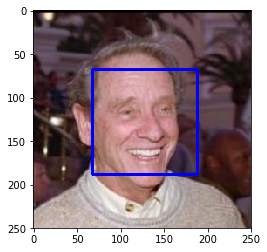

In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [7]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
Human faces correctly classified: 99%

Dog faces mistakenly classified as human faces: 11%


In [11]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_face_count = 0
dog_face_count = 0

for img in human_files_short:
    if face_detector(img) == True:
        human_face_count +=1
        
for img in dog_files_short:
    if face_detector(img) == True:
        dog_face_count +=1

print ("Correctly Detected Human Faces: ", human_face_count)
print ("Images wrongly classified as human faces: ", dog_face_count)

('Correctly Detected Human Faces: ', 99)
('Images wrongly classified as human faces: ', 11)


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [15]:
!conda install -c pytorch pytorch --y


Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pandas==0.24.2=py27he6710b0_0
  - defaults/linux-64::seaborn==0.9.0=py27_0
  - defaults/linux-64::numpy-base==1.16.5=py27hde5b4d6_0
  - defaults/linux-64::pytables==3.5.2=py27h71ec239_1
  - defaults/linux-64::matplotlib==2.2.3=py27hb69df0a_0
  - defaults/linux-64::imageio==2.6.1=py27_0
  - defaults/linux-64::bottleneck==1.2.1=py27h035aef0_1
  - defaults/linux-64::numexpr==2.7.0=py27h9e4a6bb_0
  - defaults/noarch::dask==1.2.2=py_0
  - defaults/linux-64::mkl_fft==1.0.15=py27ha843d7b_0
  - defaults/linux-64::astropy==2.0.9=py27hdd07704_0
  - defaults/linux-64::statsmodels==0.10.1=py27hdd07704_0
  - defaults/linux-64::bkcharts==0.2=py27_0
  - defaults/linux-64::numpy==1.16.5=py27h7e9f1db_0
  - defaults/linux-64::bokeh==1.4.0=py27_0
  - defaults/linux-64::h5py==2.9.0=py27h7918eee_0
  - defaults/linux-64::pywavelets==1.

In [16]:
!conda install -c pytorch torchvision --y

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pandas==0.24.2=py27he6710b0_0
  - defaults/linux-64::seaborn==0.9.0=py27_0
  - defaults/linux-64::numpy-base==1.16.5=py27hde5b4d6_0
  - defaults/linux-64::pytables==3.5.2=py27h71ec239_1
  - defaults/linux-64::matplotlib==2.2.3=py27hb69df0a_0
  - defaults/linux-64::imageio==2.6.1=py27_0
  - defaults/linux-64::bottleneck==1.2.1=py27h035aef0_1
  - defaults/linux-64::numexpr==2.7.0=py27h9e4a6bb_0
  - defaults/noarch::dask==1.2.2=py_0
  - defaults/linux-64::mkl_fft==1.0.15=py27ha843d7b_0
  - defaults/linux-64::astropy==2.0.9=py27hdd07704_0
  - defaults/linux-64::statsmodels==0.10.1=py27hdd07704_0
  - defaults/linux-64::bkcharts==0.2=py27_0
  - defaults/linux-64::numpy==1.16.5=py27h7e9f1db_0
  - defaults/linux-64::bokeh==1.4.0=py27_0
  - defaults/linux-64::h5py==2.9.0=py27h7918eee_0
  - defaults/linux-64::pywavelets==1.

In [17]:
import torch
import torchvision.models as models
from torchvision.models.vgg import model_urls
import torchvision.transforms as transforms

model_urls['vgg16'] = model_urls['vgg16'].replace('https://', 'http://')


# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "http://download.pytorch.org/models/vgg16-397923af.pth" to /home/ec2-user/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [18]:
from PIL import Image, ImageFile
import torchvision.transforms as transforms
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
        
    image = Image.open(img_path).convert('RGB')
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    
    transformations = transforms.Compose([transforms.Resize(size=(224, 224)),
                                         transforms.ToTensor(),
                                         normalize])
    
    transformed_image = transformations(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        transformed_image = transformed_image.cuda()
    
    output = VGG16(transformed_image)
    
    return torch.max(output,1)[1].item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [19]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    predicted_index = VGG16_predict(img_path)
    
    result = predicted_index >=151 and predicted_index <=268
    
    return result # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
In dog_files_short, all dog faces are correctly detected - 100%

In human_files_short, 1% of images is misclassified.

In [20]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_detector_dogs = 0
dog_detector_humans = 0

for img in human_files_short:
    if dog_detector(img) == True:
        dog_detector_humans +=1
        
for img in dog_files_short:
    if dog_detector(img) == True:
        dog_detector_dogs +=1

print ("Correctly Detected Dog Faces: ", dog_detector_dogs)
print ("Images wrongly classified in human faces: ", dog_detector_humans)


('Correctly Detected Dog Faces: ', 100)
('Images wrongly classified in human faces: ', 0)


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [21]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
!conda install -c pytorch pytorch --y

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::jupyter_console==5.2.0=py27_1
  - defaults/linux-64::pandas==0.24.2=py27he6710b0_0
  - defaults/linux-64::seaborn==0.9.0=py27_0
  - defaults/noarch::qtconsole==4.7.2=py_0
  - defaults/linux-64::jupyterlab==0.33.11=py27_0
  - defaults/linux-64::numpy-base==1.16.5=py27hde5b4d6_0
  - defaults/linux-64::pytables==3.5.2=py27h71ec239_1
  - defaults/linux-64::nbformat==4.4.0=py27_0
  - defaults/linux-64::notebook==5.7.8=py27_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/linux-64::nbconvert==5.6.1=py27_0
  - defaults/linux-64::jupyterlab_launcher==0.11.2=py27h28b3542_0
  - defaults/linux-64::ipyparallel==6.2.4=py27_0
  - defaults/linux-64::imageio==2.6.1=py27_0
  - defaults/linux-64::jupyter==1.0.0=py27_7
  - defaults/linux-64::pytest==4.6.2=py27_0
  - defaults/linux-64::bottleneck==1.2.1=py27h035aef0_1

In [19]:
!conda install -c conda-forge torchvision --y

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pandas==0.24.2=py27he6710b0_0
  - defaults/linux-64::seaborn==0.9.0=py27_0
  - defaults/linux-64::numpy-base==1.16.5=py27hde5b4d6_0
  - defaults/linux-64::pytables==3.5.2=py27h71ec239_1
  - defaults/linux-64::matplotlib==2.2.3=py27hb69df0a_0
  - defaults/linux-64::imageio==2.6.1=py27_0
  - defaults/linux-64::bottleneck==1.2.1=py27h035aef0_1
  - defaults/linux-64::numexpr==2.7.0=py27h9e4a6bb_0
  - defaults/noarch::dask==1.2.2=py_0
  - defaults/linux-64::mkl_fft==1.0.15=py27ha843d7b_0
  - defaults/linux-64::astropy==2.0.9=py27hdd07704_0
  - defaults/linux-64::statsmodels==0.10.1=py27hdd07704_0
  - defaults/linux-64::bkcharts==0.2=py27_0
  - defaults/linux-64::numpy==1.16.5=py27h7e9f1db_0
  - defaults/linux-64::bokeh==1.4.0=py27_0
  - defaults/linux-64::h5py==2.9.0=py27h7918eee_0
  - defaults/linux-64::pywavelets==1.

In [22]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

data_dir = 'dogImages/'

train_path = data_dir + 'train'
val_path = data_dir + 'valid'
test_path = data_dir + 'test'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

train_dataset = datasets.ImageFolder(train_path,  transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            normalize,
        ]))

val_dataset = datasets.ImageFolder(val_path,  transforms.Compose([
            transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            normalize,
        ]))

test_dataset = datasets.ImageFolder(test_path,  transforms.Compose([
             transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, num_workers = num_workers, shuffle = True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size= batch_size, num_workers = num_workers)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= batch_size, num_workers = num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': val_loader,
    'test': test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
Most of the Pre trained models like VGG16 takes the size (224,224) as input, so I have used this size.

For train data, I have done image augmentation to avoid overfitting the model. Transforms used: Random resize crop to 224, random flipping and random rotation.

For validation and test data, I have done only image resizing.

I have applied normalization to all three datasets.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [23]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
                
        self.conv1 = nn.Conv2d(3, 36, 3, padding=1)
        self.conv2 = nn.Conv2d(36, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)     
        self.pool = nn.MaxPool2d(2, 2)   
        self.fc1 = nn.Linear(28*28*128, 512)
        self.fc2 = nn.Linear(512, 133) 
        self.dropout = nn.Dropout(0.25) 
        self.batch_norm = nn.BatchNorm1d(512)
    
    def forward(self, x):
                
        x = self.pool(F.relu(self.conv1(x)))               
        x = self.pool(F.relu(self.conv2(x)))                      
        x = self.pool(F.relu(self.conv3(x)))                
                      
        x = x.view(-1, 28*28*128)
        
        x = F.relu(self.batch_norm(self.fc1(x)))        
        x = self.dropout(x)        
        x = F.relu(self.fc2(x))
               
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()


Net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The model has 3 convolutional layers. All convolutional layers has kernal size of 3 and stride 1. The first conv layer (conv1) have in_channels =3 and the final conv layer (conv3) produces an output size of 128.

ReLU activation function is used here. The pooling layer of (2,2) is used which will reduce the input size by 2. We have two fully connected layers that finally produces 133 dimensional output. A dropout of 0.25 is added to avoid overfitting.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [24]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving the model'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss   
            
    # return trained model
    return model


# train the model
model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 5.004570 	Validation Loss: 4.329999
Validation loss decreased (inf --> 4.329999). Saving the model
Epoch: 2 	Training Loss: 4.608289 	Validation Loss: 4.522660
Epoch: 3 	Training Loss: 4.789096 	Validation Loss: 3.951020
Validation loss decreased (4.329999 --> 3.951020). Saving the model
Epoch: 4 	Training Loss: 4.482304 	Validation Loss: 3.765435
Validation loss decreased (3.951020 --> 3.765435). Saving the model
Epoch: 5 	Training Loss: 4.242426 	Validation Loss: 4.079104
Epoch: 6 	Training Loss: 4.042573 	Validation Loss: 4.078321
Epoch: 7 	Training Loss: 4.098496 	Validation Loss: 4.005385
Epoch: 8 	Training Loss: 3.681279 	Validation Loss: 4.000997
Epoch: 9 	Training Loss: 3.805230 	Validation Loss: 4.288926
Epoch: 10 	Training Loss: 4.150966 	Validation Loss: 4.024069
Epoch: 11 	Training Loss: 4.054347 	Validation Loss: 4.386996
Epoch: 12 	Training Loss: 4.368896 	Validation Loss: 4.127631
Epoch: 13 	Training Loss: 3.453841 	Validation Loss: 4.208079
Epoc

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [25]:
import torch
model_scratch= Net()
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

In [26]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.843793


Test Accuracy:  7% (59/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [27]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [28]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet101(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [29]:
for param in model_transfer.parameters():
    param.requires_grad = False
    
model_transfer.fc = nn.Linear(2048, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I have decided to use the resnet101 architecture which is pre-trained on Imagenet dataset, The architecture is 101 layers deep, within just 5 epochs, the model got 81% accuracy. If we train for more epochs, the accuracy can be significantly improved.

Steps:

Import pre-trained resnet101 model
Change the out_features of fully connected layer to 133 to solve the classification problem
CrossEntropy loss function is chosen as loss function.
Trained for 5 epochs and got 81% accuracy.




### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving the model'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss   
            
    # return trained model
    return model



In [32]:
# train the model
#model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
#model_transfer =  train(5, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [34]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.523007


Test Accuracy: 62% (519/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
data_transfer = loaders_transfer
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    transformations = transforms.Compose([transforms.Resize(size=(224, 224)),
                                         transforms.ToTensor(),
                                         normalize])
    
    transformed_image = transformations(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        transformed_image = transformed_image.cuda()
    
    output = model_transfer(transformed_image)
    
    pred_index = torch.max(output,1)[1].item()
    
    return class_names[pred_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def load_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
   
    if face_detector(img_path):
        print ("Hey !! Human Creature!!")
        predicted_breed = predict_breed_transfer(img_path)
        print("Predicted breed: ",predicted_breed)
        load_image(img_path)
                
    elif dog_detector(img_path):
        print ("Hey!! Dog!")
        predicted_breed = predict_breed_transfer(img_path)
        print("Predicted breed: ",predicted_breed)
        load_image(img_path)
        
    else:
        print ("Image not valid!")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
I think the model created using transfer learning performed very well.

Improvement areas:

More training data will help in model improvement.
Hyper parameter tuning will also help in improving performance.
More image augmentation can be tried to improve accuracy.

Hey !! Human Creature!!
('Predicted breed: ', 'Dogue de bordeaux')


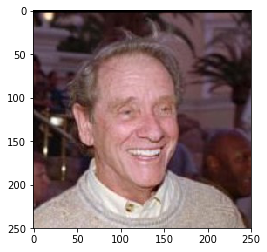

Hey !! Human Creature!!
('Predicted breed: ', 'German shepherd dog')


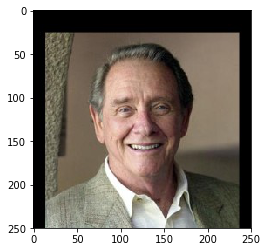

Hey !! Human Creature!!
('Predicted breed: ', 'Poodle')


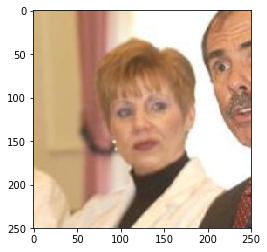

Hey!! Dog!
('Predicted breed: ', 'Cardigan welsh corgi')


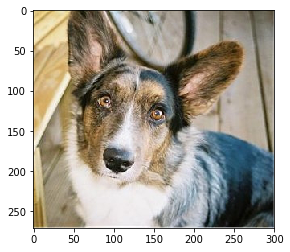

Hey!! Dog!
('Predicted breed: ', 'Cardigan welsh corgi')


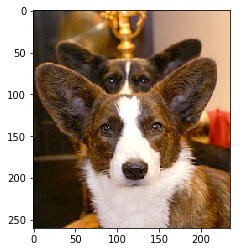

Hey!! Dog!
('Predicted breed: ', 'Cardigan welsh corgi')


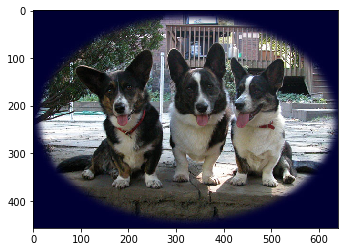

In [37]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [38]:
print("Yeyyyy! I did my capstone project")

Yeyyyy! I did my capstone project
